In [6]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt
import asyncio
import pandas as pd

from finance.moex import shares, index



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# Индекс гос. облигаций, с поправками на купоны и рефинансирование
ofz = index.fetch_index()

# Индекс отрасли нефти и газа
og = index.fetch_index("MOEXOG")

# История акций газпрома
gazp = shares.share_adjusted("GAZP")

ofz, og, gazp = await asyncio.gather(ofz, og, gazp)

In [20]:
print(ofz.columns)
print(og.columns)
print(gazp.columns)

Index(['CLOSE', 'logret'], dtype='object')
Index(['CLOSE', 'logret'], dtype='object')
Index(['open', 'high', 'low', 'close', 'volume', 'dividend', 'split_ratio',
       'adj_close', 'logret'],
      dtype='object')


In [55]:
import numpy as np
from datetime import datetime


START_DATE = pd.to_datetime("2022-06-01")
ofz_2020 = ofz[ofz.index > START_DATE].copy()
gazp_2020 = gazp[gazp.index > START_DATE].copy()
og_2020 = og[og.index > START_DATE].copy()

ofz_idx = ofz_2020.index.copy().strftime("%Y-%m-%d")
gazp_idx = gazp_2020.index.copy().strftime("%Y-%m-%d")
og_idx = og_2020.index.copy().strftime("%Y-%m-%d")

names, idxs = ["ofz", "gazp", "og"], [ofz_idx, gazp_idx, og_idx]
for name1, idx1 in zip(names, idxs):
    for name2, idx2 in zip(names, idxs):
        if name1 == name2:
            continue
        
        diff = np.setdiff1d(idx1, idx2, True)

        if len(diff) != 0:
            print(f"{name1} \\ {name2}")
            print(diff)

gazp \ ofz
['2025-03-01' '2025-03-02' '2025-03-15' '2025-03-16' '2025-03-29'
 '2025-03-30' '2025-04-05' '2025-04-06' '2025-04-12' '2025-04-13'
 '2025-04-26' '2025-04-27' '2025-05-03' '2025-05-04' '2025-05-10'
 '2025-05-11' '2025-05-17' '2025-05-18' '2025-05-31' '2025-06-01'
 '2025-06-07' '2025-06-08' '2025-06-14' '2025-06-15' '2025-06-28'
 '2025-06-29' '2025-07-05' '2025-07-06' '2025-07-12' '2025-07-13'
 '2025-07-19' '2025-07-20' '2025-07-26' '2025-07-27' '2025-08-16'
 '2025-08-17' '2025-08-23' '2025-08-24' '2025-08-30' '2025-08-31'
 '2025-09-06' '2025-09-07' '2025-09-13' '2025-09-14' '2025-09-27'
 '2025-09-28' '2025-10-04' '2025-10-05' '2025-10-11' '2025-10-12'
 '2025-10-18' '2025-10-19' '2025-10-22']
gazp \ og
['2025-03-01' '2025-03-02' '2025-03-15' '2025-03-16' '2025-03-29'
 '2025-03-30' '2025-04-05' '2025-04-06' '2025-04-12' '2025-04-13'
 '2025-04-26' '2025-04-27' '2025-05-03' '2025-05-04' '2025-05-10'
 '2025-05-11' '2025-05-17' '2025-05-18' '2025-05-31' '2025-06-01'
 '2025-06-07' 

[]

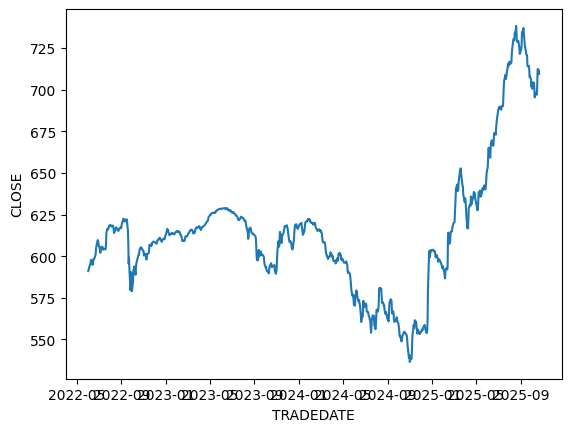

In [56]:
sns.lineplot(ofz_2020,x=ofz_2020.index, y="CLOSE")
plt.plot()

[]

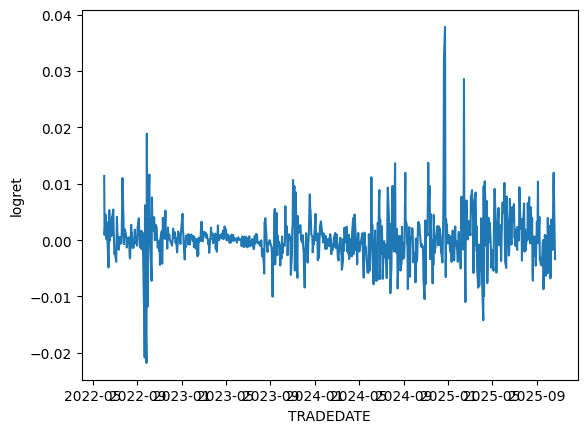

In [57]:
sns.lineplot(ofz_2020,x=ofz_2020.index, y="logret")
plt.plot()

-0.0006535034093832473


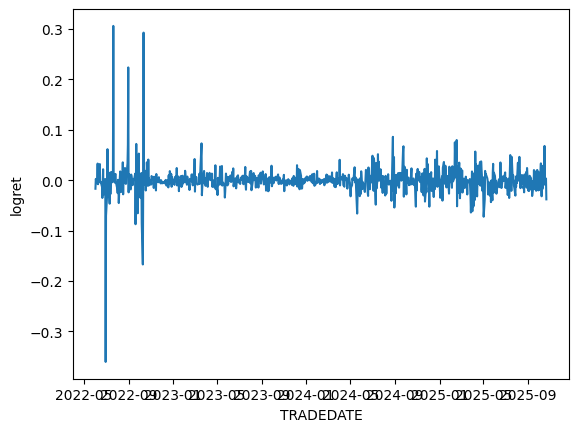

In [58]:
inters = ofz_2020.index.intersection(gazp_2020.index)
ofz_sub = ofz_2020.loc[inters]
gazp_sub = gazp_2020.loc[inters]

x = ofz_sub.index
y = gazp_sub["logret"] - ofz_sub["logret"]
print(np.sum(y) / len(gazp_sub))

sns.lineplot(x=x, y=y)
plt.show()

In [59]:
async def calc_mean_excess(share):
    share = await shares.share_adjusted(share)
    
    inters = ofz_2020.index.intersection(share.index)
    ofz_sub = ofz_2020.loc[inters]
    share_sub = share.loc[inters]
    
    x = ofz_sub.index
    y = share_sub["logret"] - ofz_sub["logret"]
    print(f"Approx: {(np.sum(y) / len(share)).item() * 100.0:.5f}%")
    
    sns.lineplot(x=x, y=y)
    plt.show()

Approx: 0.01912%


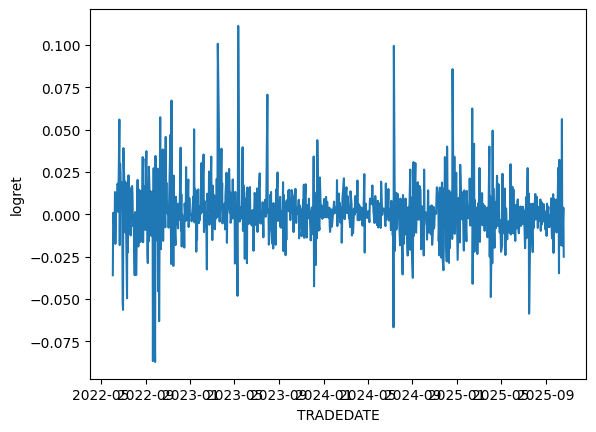

In [60]:
await calc_mean_excess("SBER")

Approx: -0.01940%


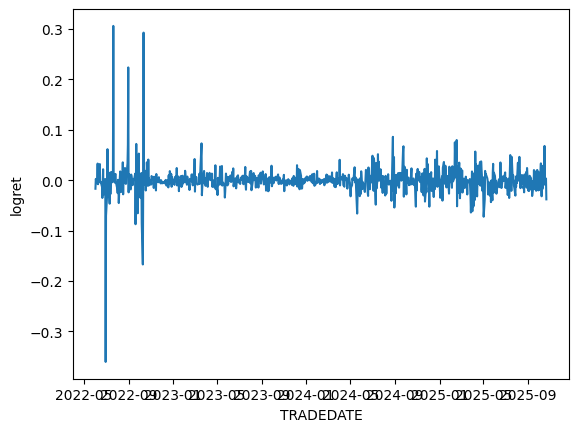

In [61]:
await calc_mean_excess("GAZP")

Approx: 0.01198%


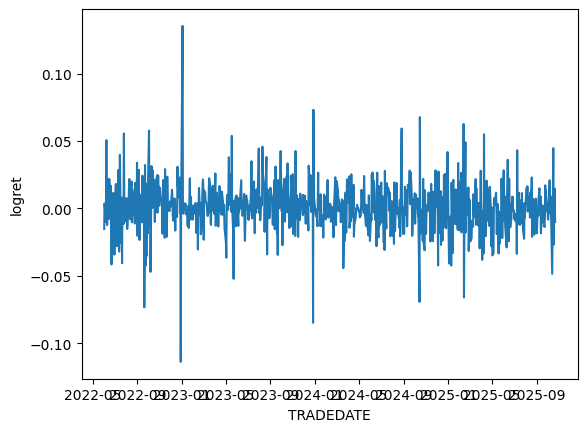

In [62]:
await calc_mean_excess("SIBN")

Approx: -0.01822%


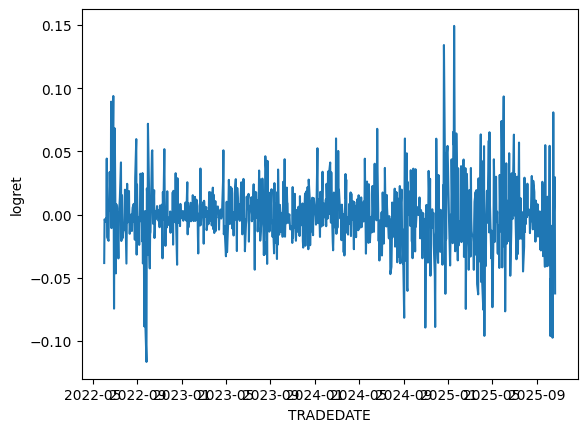

In [63]:
await calc_mean_excess("PIKK")

Approx: 0.00132%


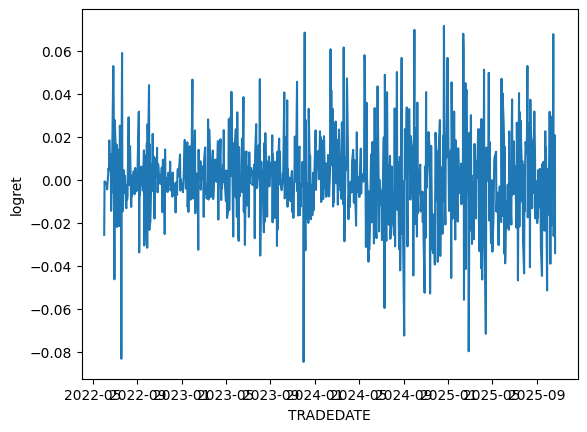

In [64]:
await calc_mean_excess("RTKM")

Approx: 0.03828%


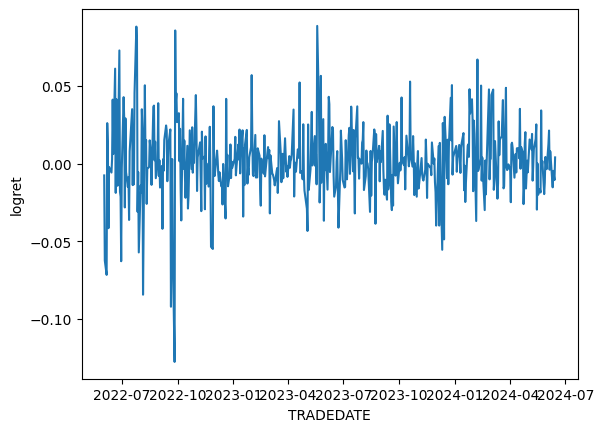

In [65]:
await calc_mean_excess("YNDX")

Approx: -0.08273%


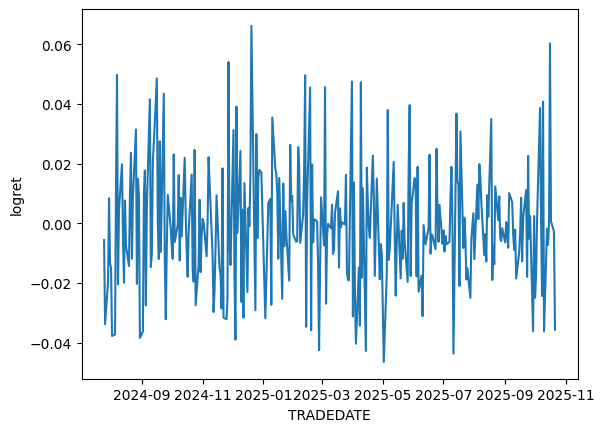

In [66]:
await calc_mean_excess("YDEX")

Approx: 0.00798%


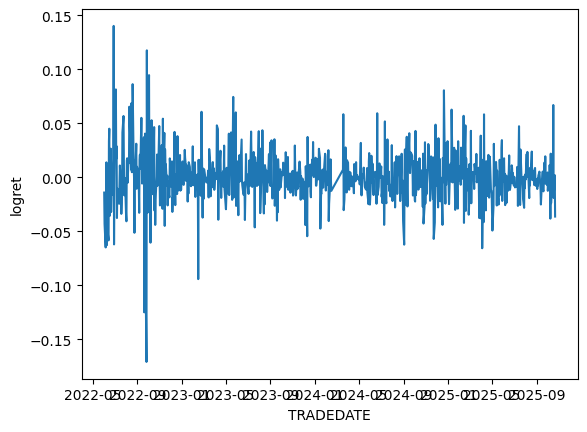

In [67]:
await calc_mean_excess("T")